# Database and Information System Characterising Objects in Space

[ESA DISCOS Website](https://discosweb.esoc.esa.int/)

## Code

### Setting up python

In [8]:
#calling pandas for data manipulation
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#calling pprint and Request for API Calls
from pprint import pprint
import requests

API Setup info https://discosweb.esoc.esa.int/apidocs/v2

### Setting up API Connection

Test

In [2]:
#Connection to data souce API
URL = 'https://discosweb.esoc.esa.int'
token = 'ImUwYzQ2YTk1LWIzODQtNDVlYi1hNjUzLTAzZjAxYzEwYjI5NSI.A2EkjCeiipEzbpiP1hybmPOAP3o'

# Calling API and retriving data
response = requests.get(
    f'{URL}/api/objects',
    headers={
        'Authorization': f'Bearer {token}',
        'DiscosWeb-Api-Version': '2',
    },
    params={
        #Filtering data
        'filter': "eq(objectClass,Payload)&gt(reentry.epoch,epoch:'2020-01-01')",
        'sort': '-reentry.epoch',
    },
)

doc = response.json()

#checking data and outputing it
if response.ok:
    pprint('everything okay')
    print(doc)
else:

    pprint(doc['errors'])

'everything okay'
{'data': [{'type': 'object', 'attributes': {'xSectMax': 23.657, 'vimpelId': None, 'xSectAvg': 13.5615, 'name': 'Starlink 1118', 'diameter': None, 'depth': 1.5, 'mass': 260.0, 'span': 8.86, 'cosparId': '2020-001BB', 'satno': 44963, 'height': 0.1, 'width': 3.7, 'xSectMin': 0.2311, 'shape': 'Box + 1 Pan', 'objectClass': 'Payload'}, 'relationships': {'reentry': {'links': {'self': '/api/objects/62184/relationships/reentry', 'related': '/api/objects/62184/reentry'}}, 'operators': {'links': {'self': '/api/objects/62184/relationships/operators', 'related': '/api/objects/62184/operators'}}, 'launch': {'links': {'self': '/api/objects/62184/relationships/launch', 'related': '/api/objects/62184/launch'}}, 'destinationOrbits': {'links': {'self': '/api/objects/62184/relationships/destination-orbits', 'related': '/api/objects/62184/destination-orbits'}}, 'initialOrbits': {'links': {'self': '/api/objects/62184/relationships/initial-orbits', 'related': '/api/objects/62184/initial-orbi

Full pull of data **TAKES A BIT TO RUN**

In [3]:
#"https://discosweb.esoc.esa.int/api/objects?filter=eq(objectClass,Payload)"

#response = response.get('https://discosweb.esoc.esa.int/api/objects?filter=eq(objectClass,Payload)')

page = 1
doc = {}

while(page<263):# 262 total pages
  response = requests.get(
      f'{URL}/api/objects?page%5Bsize%5D=100&page%5Bnumber%5D={page}',
      headers={
          'Authorization': f'Bearer {token}',
          'DiscosWeb-Api-Version': '2',
      },
      params={
          'filter': "and(cosparId=ne=null,mass=ne=null)"
      }
  )
  if response.status_code == 200:
      data = response.json()
      doc[page] = data
  #else:
      #print(f"Error: {response.status_code}")
      #break

  page += 1

#print(doc)



### Converting response doc to a Dataframe

In [4]:
data_list = [item['attributes'] for page_data in doc.values() for item in page_data['data']]

df = pd.DataFrame(data_list)

df



,xSectMax,vimpelId,xSectAvg,name,diameter,depth,mass,span,cosparId,satno,height,width,xSectMin,shape,objectClass
0,NaN,NaN,NaN,Agena D debris,NaN,NaN,16.17,NaN,1969-082DS,4312.0,NaN,NaN,NaN,None,Rocket Fragmentation Debris
1,NaN,NaN,NaN,NABEO 'Pride of Bavaria' (attached to Electron...,NaN,NaN,156.00,NaN,2018-088C,43692.0,NaN,NaN,NaN,None,Rocket Body
2,17.315551,NaN,8.984400,Beidou DW 24,NaN,1.7,1014.00,10.0,2017-069A,43001.0,2.20,1.7,2.890000,Box + 2 Pan,Payload
3,17.315551,NaN,8.984400,Beidou DW 25,NaN,1.7,1014.00,10.0,2017-069B,43002.0,2.20,1.7,2.890000,Box + 2 Pan,Payload
4,39.133681,NaN,33.764267,H-18 (Long March (CZ) YF) (Long March (CZ) 3B/...,3.0,NaN,2800.00,3.0,2017-069C,43003.0,12.83,NaN,7.068583,Cyl + 1 Nozzle,Rocket Body
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2895,30.469841,NaN,13.959600,GPS IIF-4,NaN,1.8,1630.00,18.0,2013-023A,39166.0,2.50,1.8,3.240000,Box + 2 Pan,Payload
2896,37.047001,NaN,32.260230,Centaur-5 SEC (Atlas V 401),3.1,NaN,2020.00,11.7,2013-023B,39167.0,11.70,NaN,7.547676,Cyl + 1 Nozzle,Rocket Body
2897,19.135445,NaN,12.042748,Arirang-5 (KOMPSat-5),2.4,NaN,1400.00,7.0,2013-042A,39227.0,4.00,NaN,3.741230,Hex Cyl + 2 Pan,Payload
2898,117.960802,143656.0,52.962333,USA 243 (WGS SV-5),NaN,3.0,5768.00,40.9,2013-024A,39168.0,6.00,3.0,9.000000,Box + 2 Pan,Payload


# Questions

### What is the average Mass of the objects in orbit?

In [5]:
average_mass = df['mass'].mean()
print("Average mass:", average_mass)

Average mass: 2703.0548427586205


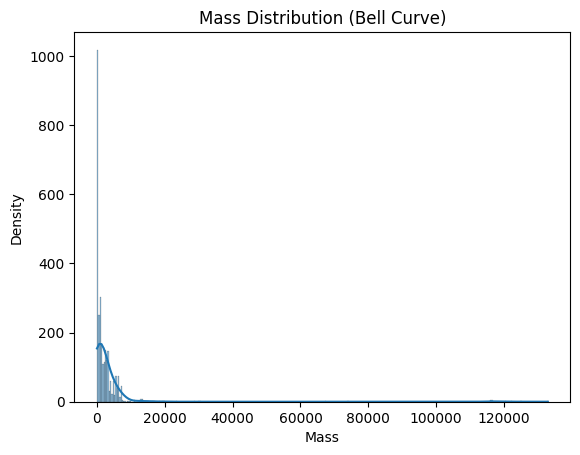

In [9]:
sns.histplot(df['mass'], kde=True)

plt.xlabel('Mass')
plt.ylabel('Density')
plt.title('Mass Distribution (Bell Curve)')
plt.show()

### What Object Class has the most entities?



In [10]:
class_counts = df['objectClass'].value_counts()

max_count_class = class_counts.idxmax()
max_count = class_counts[max_count_class]
print(f"The class with the highest count is '{max_count_class}' with a count of {max_count}.")


The class with the highest count is 'Payload' with a count of 1539.


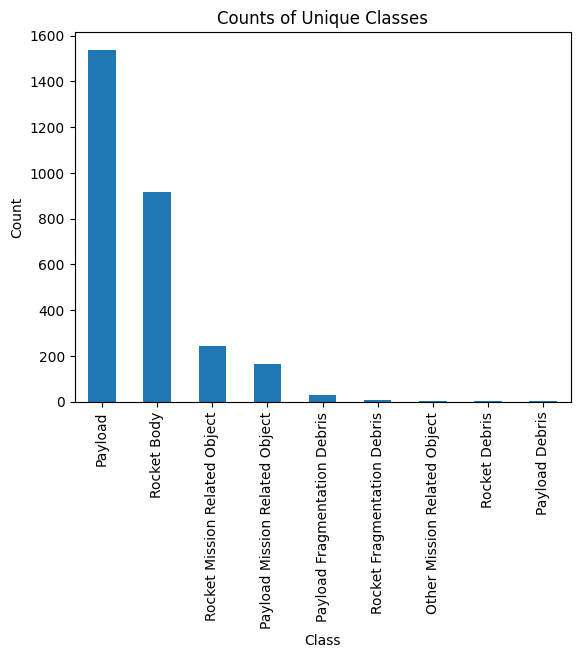

In [11]:
class_counts.plot.bar()

plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Counts of Unique Classes')

plt.show()

### What objects have the largest and smallest mass?

In [12]:
largest_mass = df.nlargest(1, 'mass')
smallest_mass = df.nsmallest(1, 'mass')

print("Largest mass:")
print(largest_mass[['name', 'mass']])
print("\nSmallest mass:")
print(smallest_mass[['name', 'mass']])

Largest mass:
                     name      mass
1791  Discovery (STS-116)  132931.0

Smallest mass:
             name   mass
203  SpaceBEE-140  0.284


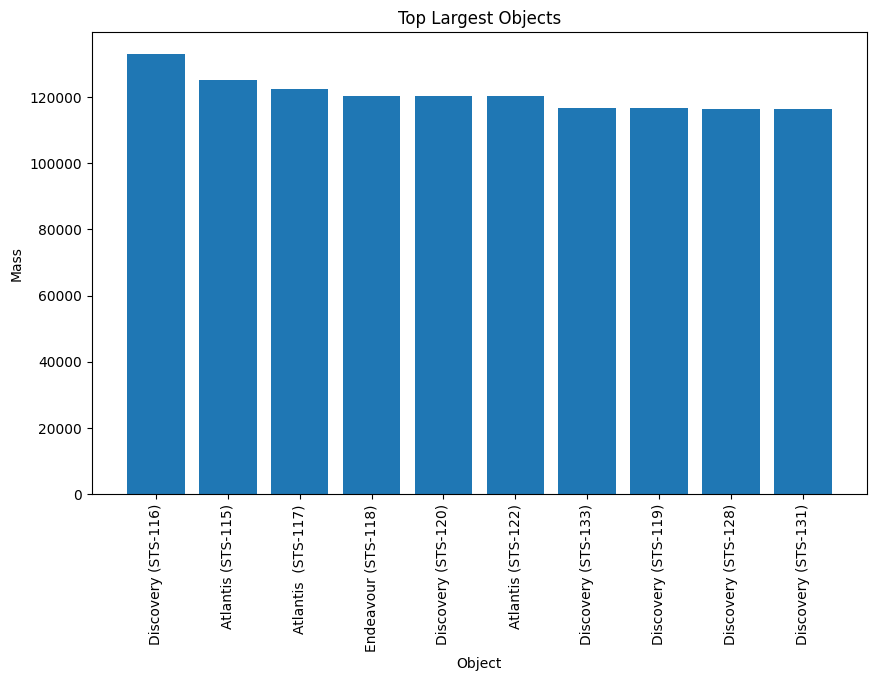

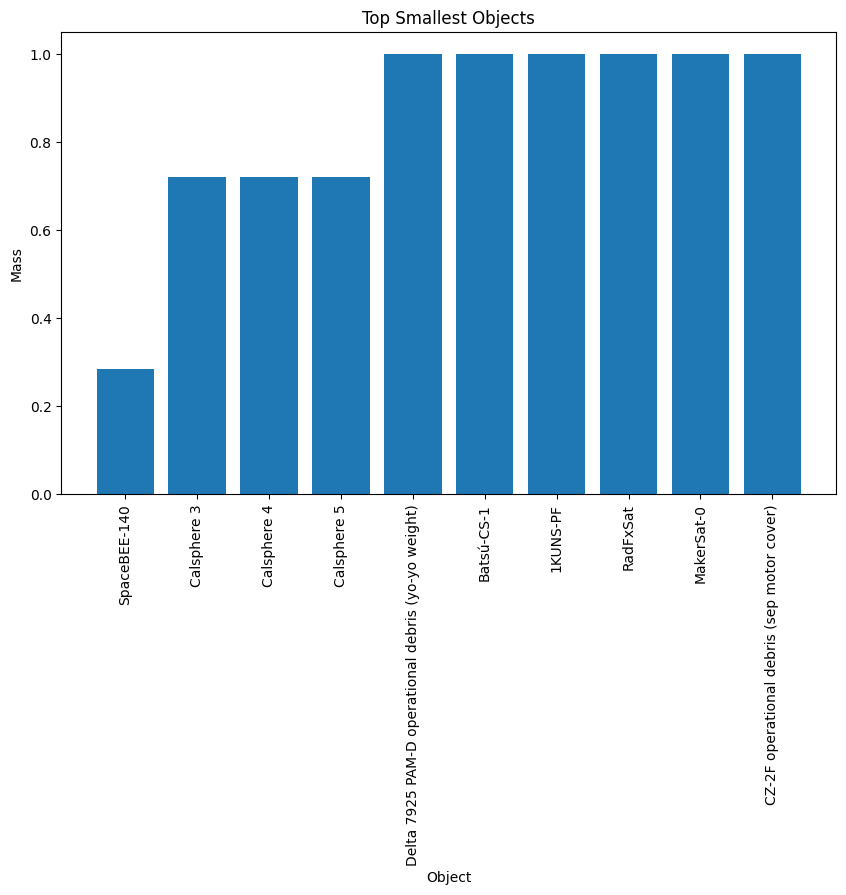

In [14]:
largest_10 = df.nlargest(10, 'mass')
smallest = df.nsmallest(10, 'mass')


plt.figure(figsize=(10, 6))
plt.bar(largest_10['name'], largest_10['mass'])
plt.xlabel('Object')
plt.ylabel('Mass')
plt.title('Top Largest Objects')

plt.xticks(rotation=90)

plt.show()

plt.figure(figsize=(10, 6))
plt.bar(smallest['name'], smallest['mass'])
plt.xlabel('Object')
plt.ylabel('Mass')
plt.title('Top Smallest Objects')


plt.xticks(rotation=90)


plt.show()